# Success Metric
## Objective
- Develop metrics to measure the success of the movie.
- The metric should be as uncorrelated to the budget invested in the movie as possible.
## Available Features
- IMDB movie average rating
- Number of IMDB movie reviews
- Budget
- Revenue
<!-- ## Model
For actor $i$ and movie $j$ as $t$th movie for actor $i$,
- $s_{i,t}$ : salary before participanting in the movie
- $s_{i,t+1}$ : salary after participanting in the movie
- $b_j$ : Budget of the movie
- $r_j$ : Revenue of the movie
- $o_{i,j}$ : order of the actor in the movie $j$'s credit
- $\theta_{i,j}$ : portion of the actor in the movie $j$. 
- $\sum_{i=1} \theta_{i,j} = 1$
- $p_{i,j}$: performance of the actor $i$ in movie $j$. 
- $p_{i,j}$ ~ $\mathcal{N}(0,1)$

We are only able to observe some of these variables, and need to estimate others.
- $s_{i,t+1}$ = $f(s_{i,t}, )$
- $\sum_i s_{i,t} = q \times b_j$ 

## Evaluation
### Evaluate  -->

## Load datas

In [ ]:
import pandas as pd
import json
tmdb_id2detail = json.load(open('tmdb_resources/tmdb_id2detail_imdb_rating.json'))
tmdb_id2credit = json.load(open('tmdb_resources/tmdb_id2credit_full.json'))
people_ids = pd.read_json(path_or_buf='tmdb_resources/people_ids.jsonl', lines=True)

In [51]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

## IMDB

In [37]:
tid2rating = { k:x['imdb_average_rating'] for k,x in tmdb_id2detail.items() if 'imdb_average_rating' in x}

Valid count:  393909


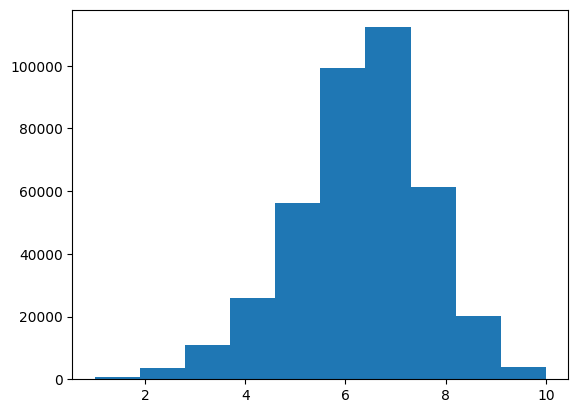

In [42]:
print('Valid count: ',len(list(tid2rating.values())))
plt.hist([v for v in tid2rating.values()])
plt.show()

Valid count:  393909


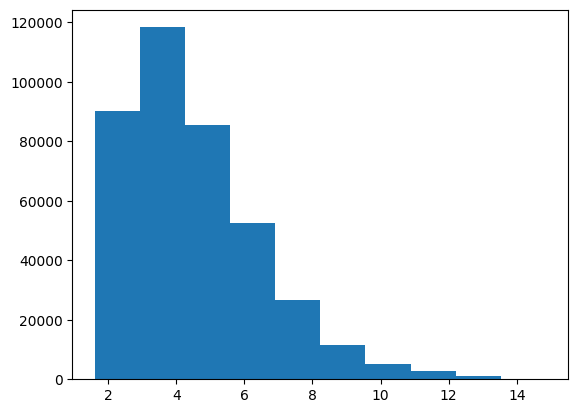

In [41]:
tid2votes = { k:math.log(x['imdb_num_votes']) for k,x in tmdb_id2detail.items() if 'imdb_num_votes' in x}
print('Valid count: ', len([v for v in tid2votes.values()]))
plt.hist([v for v in tid2votes.values()])
plt.show()

### Imdb_num_votes vs Revenue

data1: mean=55630.407 stdv=143308.409
data2: mean=44221131.667 stdv=127229022.574
PearsonRResult(statistic=0.6338790591057994, pvalue=0.0)


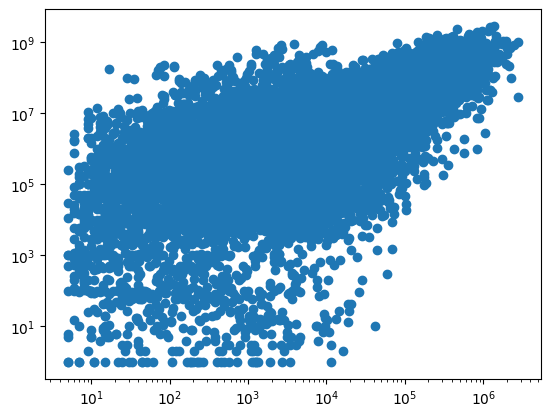

In [49]:
data_revenue_votes = [(x['imdb_num_votes'], x['revenue']) for x in tmdb_id2detail.values() if x.get('revenue') > 0 and 'imdb_num_votes' in x]
data1 = [x[0] for x in data_revenue_votes]
data2 = [x[1] for x in data_revenue_votes]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
print(pearsonr(data1,data2))
# plot
plt.scatter(data1, data2)
plt.xscale('log')
plt.yscale('log')
plt.show()

### Imdb_ratings vs Revenue

data1: mean=6.272 stdv=1.145
data2: mean=44221131.667 stdv=127229022.574
PearsonRResult(statistic=0.1480355529622561, pvalue=5.440988987010813e-80)


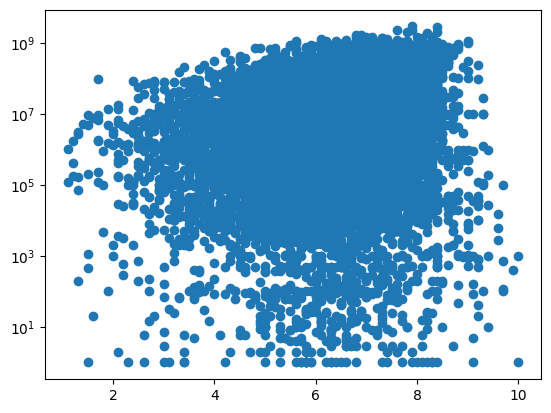

In [66]:
data_revenue_votes = [(x['imdb_average_rating'], x['revenue']) for x in tmdb_id2detail.values() if x.get('revenue') > 0 and 'imdb_average_rating' in x]
data1 = [x[0] for x in data_revenue_votes]
data2 = [x[1] for x in data_revenue_votes]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
print(pearsonr(data1,data2))
# plot
plt.scatter(data1, data2)
# plt.xscale('log')
plt.yscale('log')
plt.show()

### Num_votes ~ Budget

data1: mean=32628.028 stdv=113753.586
data2: mean=10108365.842 stdv=26687637.823
PearsonRResult(statistic=0.5199192629721061, pvalue=0.0)


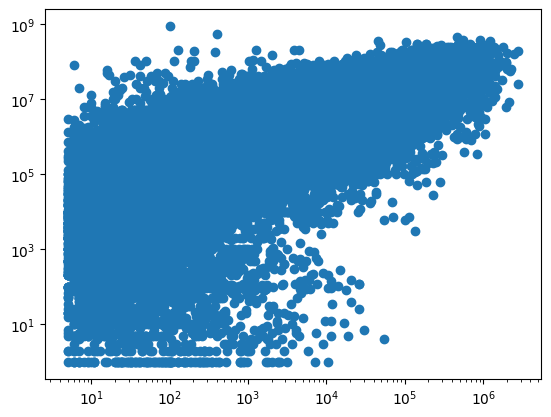

In [69]:
data_revenue_votes = [(x['imdb_num_votes'], x['budget']) for x in tmdb_id2detail.values() if x.get('budget') > 0 and 'imdb_num_votes' in x]
data1 = [x[0] for x in data_revenue_votes]
data2 = [x[1] for x in data_revenue_votes]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
print(pearsonr(data1,data2))
# plot
plt.scatter(data1, data2)
plt.xscale('log')
plt.yscale('log')
plt.show()

### IMDB_ratings vs Revenue / budget

data1: mean=6.355 stdv=1.140
data2: mean=342.725 stdv=21029.119
PearsonRResult(statistic=-0.010780126669245764, pvalue=0.2768795950865561)


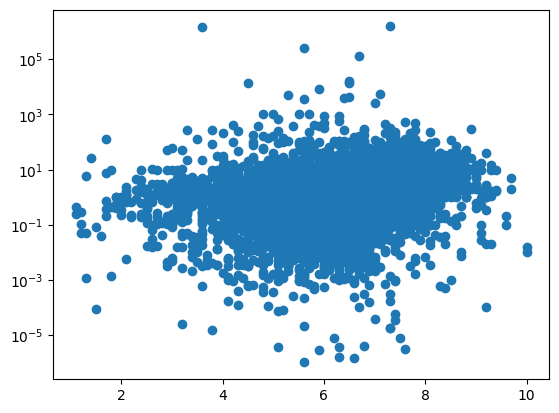

In [61]:
data_revenue_votes = [(x['imdb_average_rating'], x['revenue'] / x['budget']) for x in tmdb_id2detail.values() if x.get('budget') > 1 and x.get('revenue') > 0 and 'imdb_average_rating' in x]
data1 = [x[0] for x in data_revenue_votes]
data2 = [x[1] for x in data_revenue_votes]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
print(pearsonr(data1,data2))
# plot
plt.scatter(data1, data2)
# plt.xscale('log')
plt.yscale('log')
plt.show()

### IMDB num_votes vs Revenue / Budget

data1: mean=83485.166 stdv=174206.693
data2: mean=710.718 stdv=35824.537
PearsonRResult(statistic=-0.008903783465006476, pvalue=0.36859855810349623)


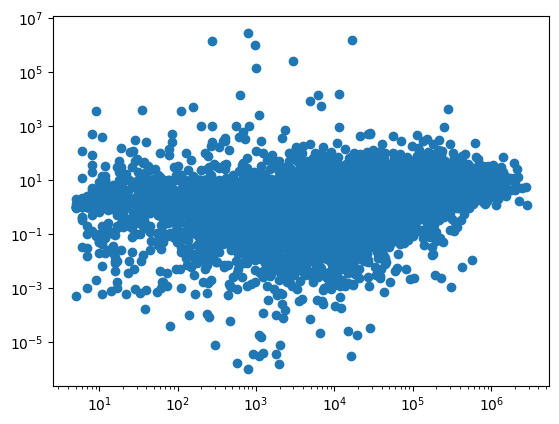

In [64]:
data_revenue_votes = [(x['imdb_num_votes'], x['revenue'] / x['budget']) for x in tmdb_id2detail.values() if x.get('budget') >0 and x.get('revenue') > 0 and 'imdb_num_votes' in x]
data1 = [x[0] for x in data_revenue_votes]
data2 = [x[1] for x in data_revenue_votes]

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
print(pearsonr(data1,data2))
# plot
plt.scatter(data1, data2)
plt.xscale('log')
plt.yscale('log')
plt.show()